Most of the new features in trading are technical indicators, price
action figures, or quantitative metrics. Here are some metrics that
will give some ideas for projects:

Quantitative features
: The variation from the N previous
period to now, moving correlation between two columns. It
will allow us to understand the short and long-term trend.

Price action patterns:
Detect some patterns to give us
information about the downward and upward forces in the
market, like engulfing and doji.

Technical indicators:
They are very versatile and can help us
understand volatility, volume variation, and momentum.

Quantitative features

N previous days
: it is one of the most accessible variables but also
one of the most important because it will allow us to understand the
previous long or short-term variation depending on the period we
take.

Moving correlation:
For this example, we will choose to compute
the moving correlation between the 10 previous day variations and
the 200 previous day variations. We do that to understand the relation
between the long-term trend and the short-term behavior. It is an
exciting feature for a machine learning algorithm (from my
experience).


In [ ]:
# N previous days variation

n = 10 
df[f"var_{n}"] = df["Adj Close"].pct_change(n)

# Moving correlation
col_1 = "var_200" 
col_2 = "var_10" 
df["moving_correlation"] = df[col_1].rolling(50).corr(df[col_2])

Price action patterns

Doji:
generally, we say that doji’s express indecision. That is why we
do not classify the doji as increasing doji or decreasing doji like in
the following figure. It is helpful for the algorithm to understand
when the investors are indecisive because it can show us the end or
the start of a trading trend.

To detect the Doji, we use the Python TA-lib library
because it is always better to use the library: you will
minimize the error risk and optimize your code.

Engulfing pattern:
There are two different engulfing patterns: the
bullish and the bearish engulfing. We can see graphically both in
Figure 10.3 and how to compute them without a library in Code 10.4.

In [ ]:
# DOJI
df["DOJI"] = ta.CDLDOJI(df[ "Open" ], df[ "High" ], df[ "Low" ], df[ "Close" ])

# ENGULFING
df[ "candle_way" ] = -1 
df.loc[(df[ "Open" ] - df[ "Close" ]) < 0 , "candle_way" ] = 1

# Amplitude 
df[ "amplitude_abs" ] = np. abs (df[ "Close" ] - df[ "Open" ]) 
df[ "Engulfing" ] = 0 
df.loc[ 
    # Yersteday red candlestick and Today increase 
    (df[ "candle_way" ].shift( 1 ) == -1 ) &\
    (df[ "candle_way" ] == 1 ) &\
    
    # Close of the last decreasing candlestick = Open of today increase candlestick 
    (df[ "Close" ].shift(1) < df[ "Open" ]( 1 + 0.5 / 100 )) &\
    (df[ "Close" ].shift( 1 ) > df[ "Open" ]( 1-0.5 / 100 )) &\
    
    # Last decreaing candlestick is less strong than the Today increasing candlestick 
    (df[ "amplitude_abs" ].shift( 1 )* 1.5 < df[ "amplitude_abs" ]), "Engulfing" 
] = 1 

df.loc[ 
    # Yersteday green candlestick and Today decrease 
    (df[ "candle_way" ].shift( 1 ) == 1 ) &
    (df[ "candle_way" ] == -1 ) &
    
    # Close of the last decreasing candlestick = Open of today decrease candlestick 
    (df[ "Close" ].shift( 1 ) < df[ "Open" ]( 1 + 0.5 / 100 )) &
    (df[ "Close" ].shift( 1 ) > df[ "Open" ]( 1-0.5 / 100 )) &
    
    # Last decreaing candlestick is less strong than the Today candlestick 
    (df[ "amplitude_abs" ].shift( 1 )* 1.5 < df[ "amplitude_abs" ]), "Engulfing" 
] = -1

Technical indicators

Resistance:
The resistance can be computed using a lot of different
ways. This book will use the max value over the last 150 periods. The
support is the same thing but using the minimum.

Relative Strength Index (RSI):
It will allow us to understand if the
market is in an overbought or overselling market. So, it is ideal to
have these features; for example, combining a doji can better predict
the retracement.

In [ ]:
# Max value in the last n days
n = 150 
df["resistance"] = df["Close"].rolling(n).max()

# RSI
n = 15 
df["RSI"] = ta.RSI(df["Close"], timeperiod=n)

In [ ]:
""" Next N days variations """ 
n = 1 
df[f"target_var_ {n}"] = df["Close"].pct_change(n).shift(n)

In [ ]:
""" Next N days variations (dummy)""" 
n = 1 
df[f"target_var_ {n}"] = df["Close"].pct_change(n).shift(n) 
df["target_dummy"] = 1 
df.loc[df[f"target_var_ {n}"]<0 , "target_dummy"] = -1

However, with this technique, it cannot be easy to profit when the
market is broad because the variation will be positive, but the
variation will be minimal. So, to avoid having this issue, we can
create a dummy variable with three values: -1, 0, and 1.
To do it, we will compute the percentiles 33 and 67. However, it is
essential to compute the percentiles using the train set not to create
any interference in the future (test set). Then, suppose the value is
below percentile 33. In that case, we classify it as -1, if it is between
percentile 33 and percentile 67 as 0, and 1 if it is greater than
percentile 67.

In [ ]:
""" Classify the variations"""

# find the variations
n = 1 
df[f"target_var_ {n}"] = df["Close"].pct_change(n).shift(n)

# Find the centile 33 and 67 on the train set
split = int(0.80 * len (df)) 
centile_33 = np.percentile(df[[f"target_var_ {n}"]].iloc[:split].dropna(), 33) 
centile_67 = np.percentile(df[f"target_var_ {n}"].iloc[:split].dropna().values, 67)

# Dummy variable
df["target_dummy"] = 0 
df.loc[df[f"target_var_ {n}"] > centile_67, "target_dummy"] = 1 
df.loc[df[f"target_var_ {n}"]<centile_33, "target_dummy" ] = -1

# Chapter 11: Support vector machine (SVM)

### 11.1. Preparation of data
> ###### 11.1.1. Features engineering
> ###### 11.1.2. Standardization

### 11.2. Support vector classifier (SVC)
> ###### 11.2.1. Intuition about how works an SVC
> ###### 11.2.2. Implementation of the model
> ###### 11.2.3. Predictions and backtest

### 11.3. Support vector regressor (SVR)
> ###### 11.3.1. Intuition about how works an SVR
> ###### 11.3.2. Implementation of the model
> ###### 11.3.3. Predictions and backtest

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from Backtest import *

### 11.1.1. Features enginneering

In [8]:
# Import EURUSD data
df = yf.download("GOOG", end="2021-01-01")[["Adj Close"]].pct_change(1)
df.columns = ["returns"]

# Features engeeniring
df["returns t-1"] = df[["returns"]].shift(1)

# Mean of returns
df["mean returns 15"] = df[["returns"]].rolling(15).mean().shift(1)
df["mean returns 60"] = df[["returns"]].rolling(60).mean().shift(1)

# Volatility of returns
df["volatility returns 15"] = df[["returns"]].rolling(15).std().shift(1)
df["volatility returns 60"] = df[["returns"]].rolling(60).std().shift(1)

# Drop missing values
df = df.dropna()

[*********************100%***********************]  1 of 1 completed


In [9]:
# Percentage train set
split = int(0.80*len(df))

# Train set creation
X_train = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[:split]

y_train_reg = df[["returns"]].iloc[:split]

y_train_cla = np.round(df[["returns"]].iloc[:split]+0.5)


# Test set creation
X_test = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[split:]

y_test_reg = df[["returns"]].iloc[split:]
y_test_cla = np.round(df[["returns"]].iloc[split:]+0.5)

### 9.1.2. Standardization

In [10]:
# Import the class
from sklearn.preprocessing import StandardScaler

# Initialize the class
sc = StandardScaler()

# Standardize the data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

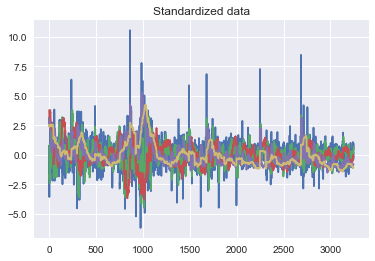

In [11]:
plt.plot(X_train_scaled)
plt.title("Standardized data")
plt.show()

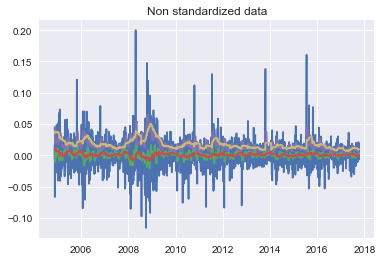

In [12]:
plt.plot(X_train)
plt.title("Non standardized data")
plt.show()

### 9.2.2. Implement an SVC

In [13]:
# Import the class
from sklearn.svm import SVC

# Initialize the class
svc = SVC()

# Fit the model
svc.fit(X_train_scaled, y_train_cla)

SVC()

### 9.2.3. Predictions ans backtest

[*********************100%***********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.249 	 Alpha: -20.76 %	     Sharpe: -0.571 	 Sortino: -0.647
  -----------------------------------------------------------------------------
    VaR: 86.43 %	 cVaR: 96.38 % 	     VaR/cVaR: 1.115 	 drawdown: 66.09 %
  -----------------------------------------------------------------------------


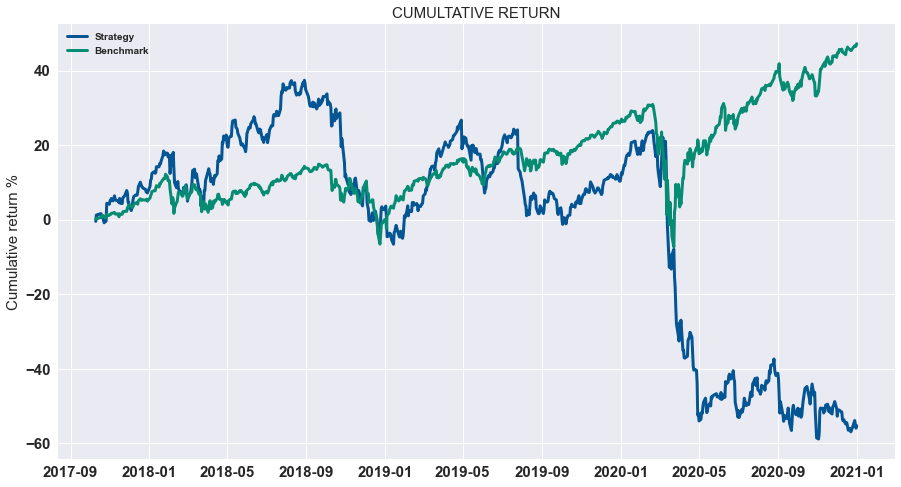

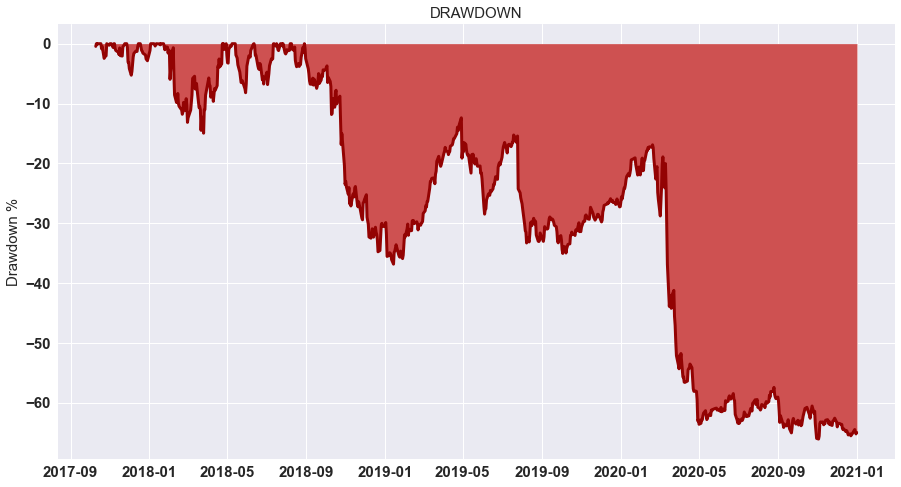

In [14]:
# Create predictions for the whole dataset
df["prediction"] = svc.predict(np.concatenate((X_train_scaled,X_test_scaled),
                                    axis=0))
df["prediction"] = np.where(df["prediction"]==0, -1, 1)

# Compute the strategy
df["strategy"] = df["prediction"] * df["returns"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[split:])

### 9.3.2. Implement an SVR

In [15]:
# Import the class
from sklearn.svm import SVR

# Initialize the class
lr = SVR()

# Fit the model
lr.fit(X_train_scaled, y_train_reg)

SVR()

### 9.3.3. Predictions and backtest

[*********************100%***********************]  1 of 1 completed

    -----------------------------------------------------------------------------
    Beta: 0.787 	 Alpha: 2.15 %	     Sharpe: 0.455 	 Sortino: 0.584
  -----------------------------------------------------------------------------
    VaR: 55.86 %	 cVaR: 66.09 % 	     VaR/cVaR: 1.183 	 drawdown: 30.32 %
  -----------------------------------------------------------------------------


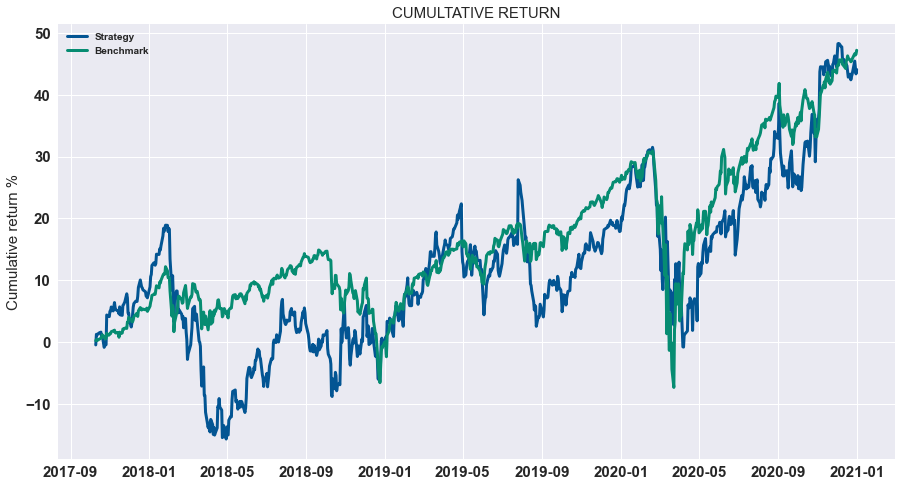

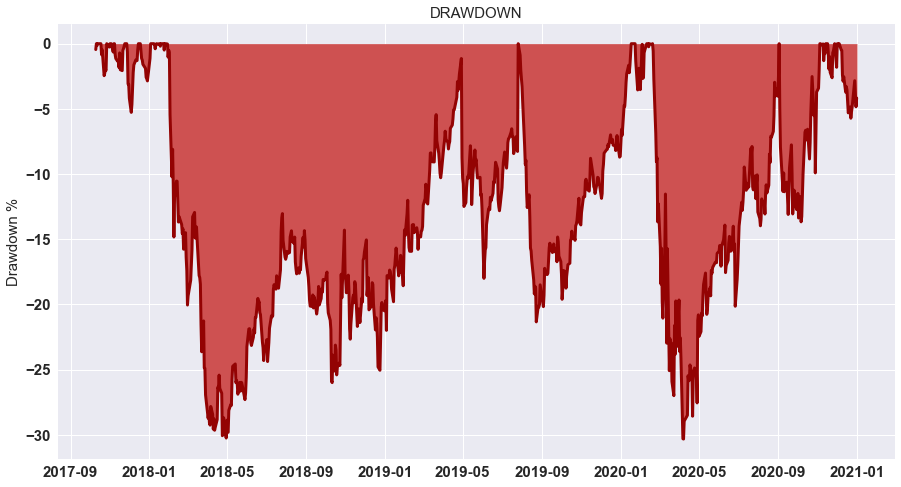

In [16]:
# Create predictions for the whole dataset
df["prediction"] = lr.predict(np.concatenate((X_train_scaled,X_test_scaled),
                                    axis=0))
# Compute the strategy
df["strategy"] = np.sign(df["prediction"]) * df["returns"]

# Backtest
backtest_dynamic_portfolio(df["strategy"].iloc[split:])